In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import pickle
from dqn import Options,DQN,DoubleDQN, DuelingDQN,Hyperparams,EnvInfo
from gridEnvironment import GridEnvironment


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/Users/mohitsaiaravindnunna/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


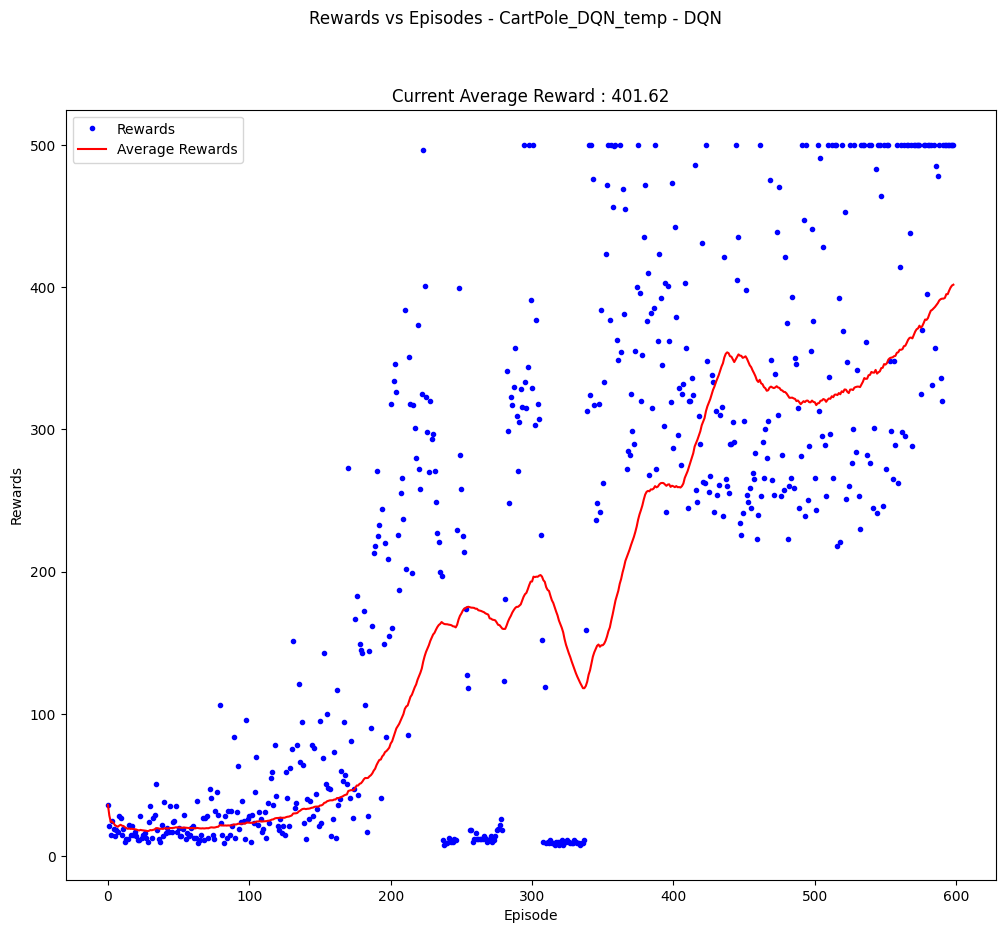

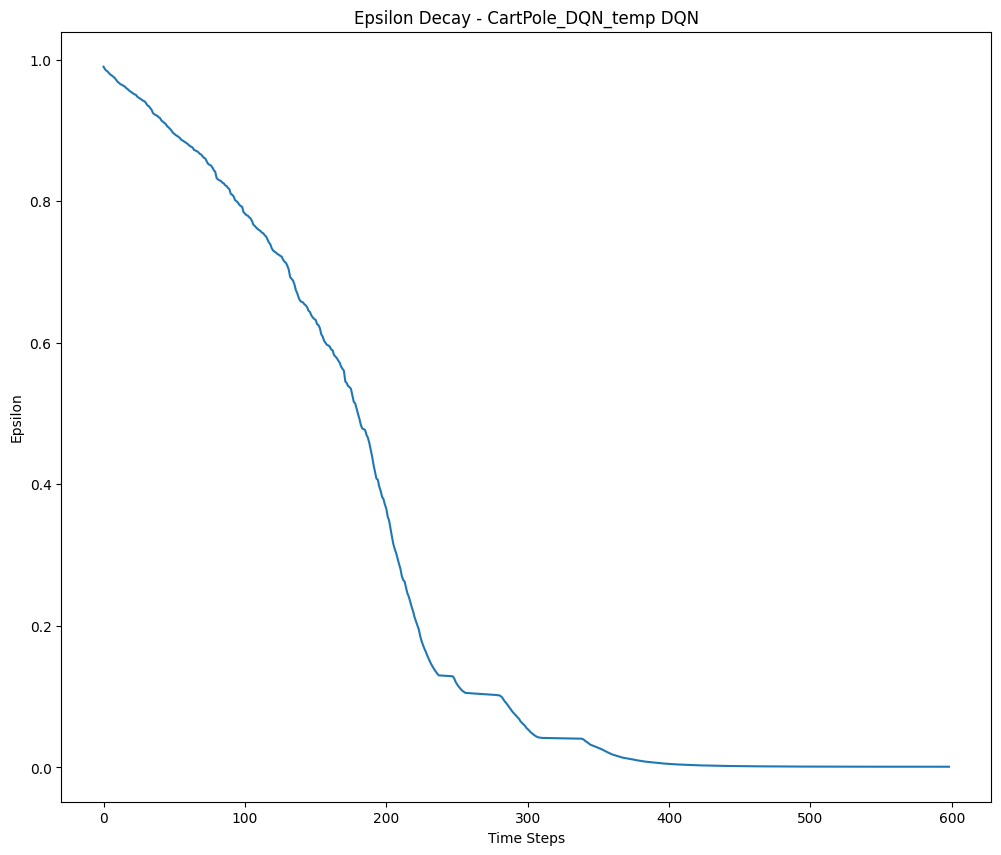

In [2]:
class NeuralNetworkForCartPole(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

dqnCartPole = DQN(
    envInfo=EnvInfo(env=gym.make('CartPole-v1')),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=10000,
        learningRate=1e-4,
        batchSize=64,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=600
    ),
    nnModel=NeuralNetworkForCartPole,
    options = Options(
        resultsPath='./results',
        filePrefix='CartPole_DQN_temp',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

dqnCartPole.train()

# dqnCartPoleGreedy = DQN(
#         envInfo=EnvInfo(env=gym.make('CartPole-v1')),
#         hyperparams=Hyperparams(
#             epsilon=0.99,
#             epsilonMin=0.001,
#             epsilonDecay=10000,
#             memorySize=10000,
#             learningRate=1e-4,
#             batchSize=64,
#             discountFactor=0.99,
#             targetNetworkUpdateFrequency=20,
#             episodes=600
#         ),
#         nnModel=NeuralNetworkForCartPole,
#         options = Options(
#             resultsPath='./results',
#             filePrefix='CartPole_DQN',
#             showLiveResults=True,
#             logResults = False,
#             saveModels = True
#         )
        
# )

# policyWeights = None
# with open('./results/weights/CartPole_DQN_policy_weights.pkl', 'rb') as f:
#     policyWeights = pickle.load(f)
# targetWeights = None
# with open('./results/weights/CartPole_DQN_target_weights.pkl', 'rb') as f:
#     targetWeights = pickle.load(f)

# dqnCartPoleGreedy.loadWeights(policyWeights,targetWeights)




--------------------------------------------------------------------------------

Episode 0                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward 328.0 
--------------------------------------------------------------------------------

Episode 5                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 6                         
Current Reward 500.0 
---------------------------

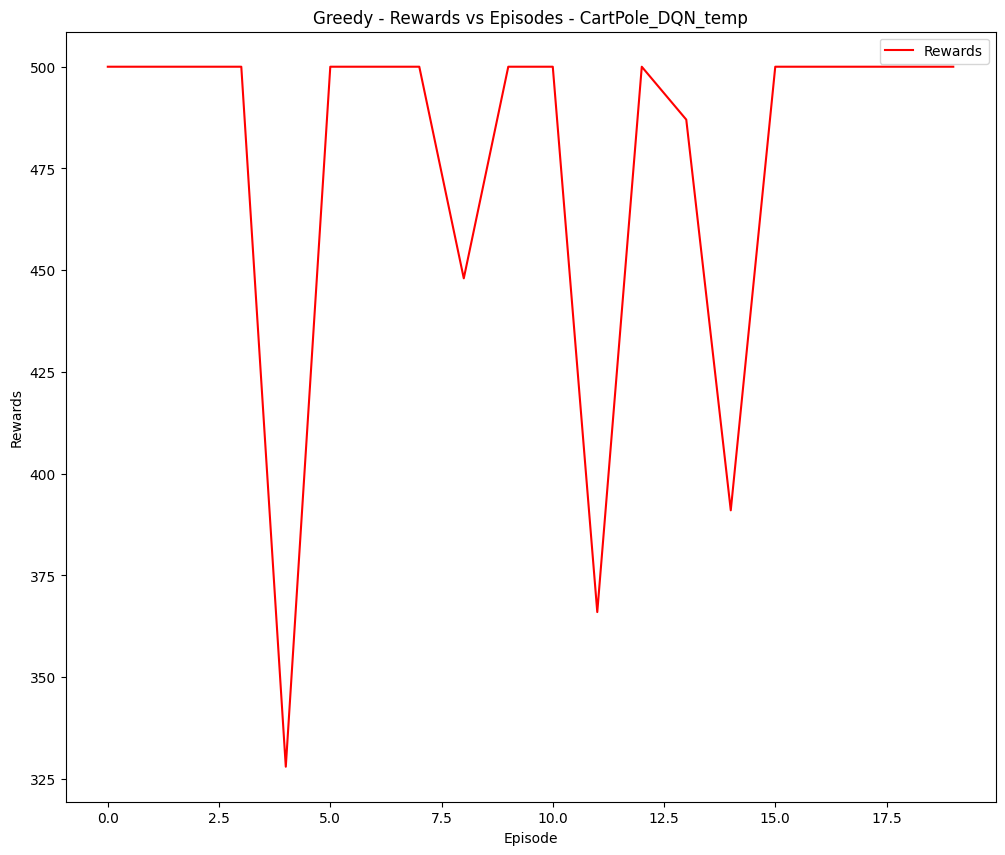

In [3]:
dqnCartPole.greedy(timeSteps=20)

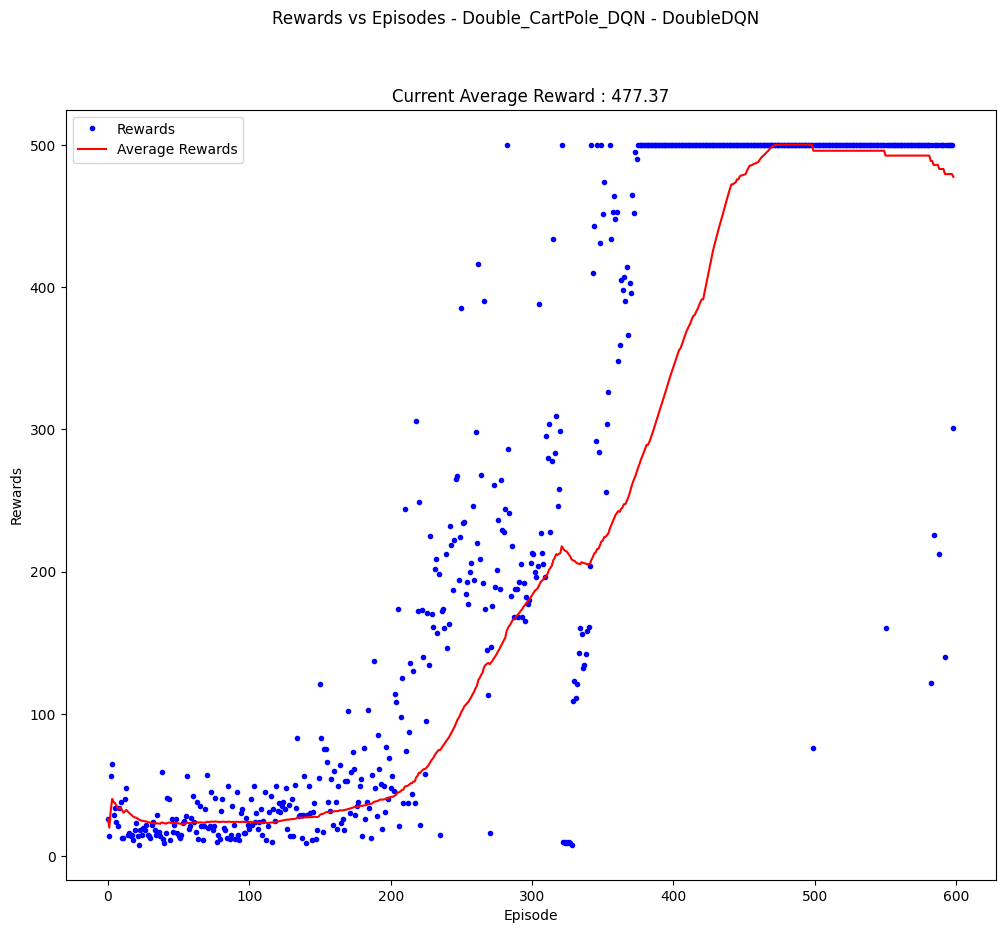

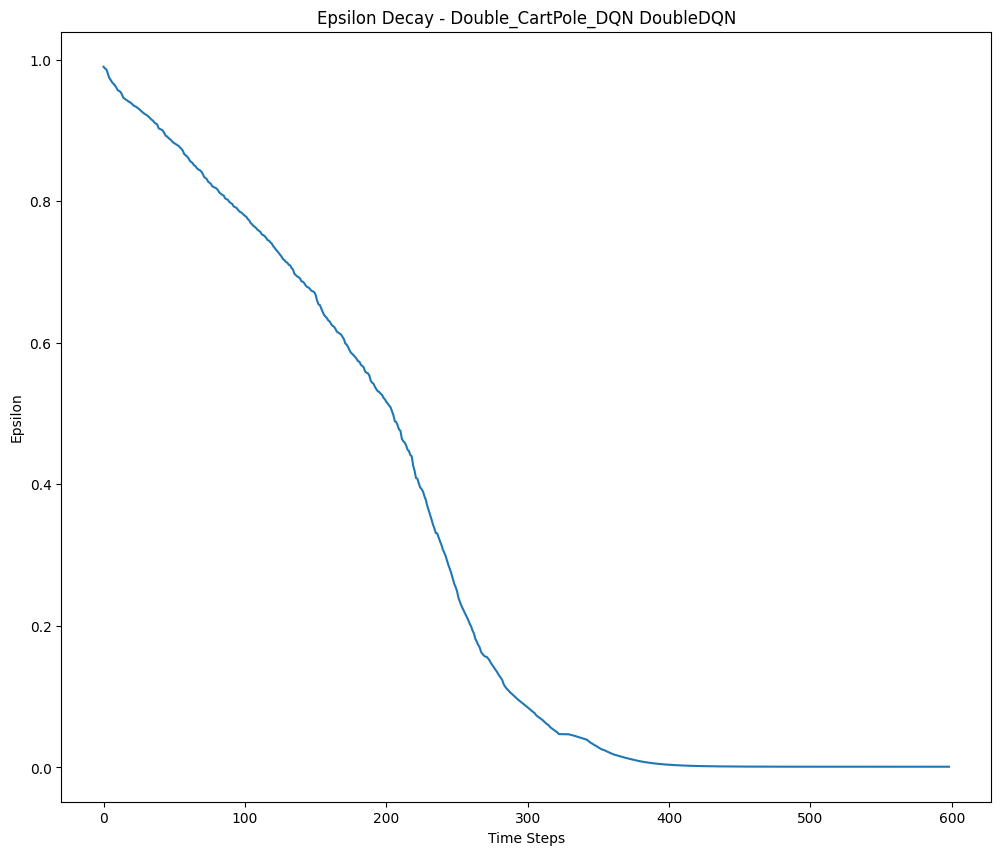

In [12]:
class NeuralNetworkForCartPole(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

dqnCartPole = DoubleDQN(
    envInfo=EnvInfo(env=gym.make('CartPole-v1')),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=5000,
        learningRate=1e-4,
        batchSize=128,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=600,
        tau=0.003
    ),
    nnModel=NeuralNetworkForCartPole,
    options = Options(
        resultsPath='./results',
        filePrefix='Double_CartPole_DQN',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

dqnCartPole.train()

# dqnCartPoleGreedy = DQN(
#         envInfo=EnvInfo(env=gym.make('CartPole-v1')),
#         hyperparams=Hyperparams(
#             epsilon=0.99,
#             epsilonMin=0.001,
#             epsilonDecay=10000,
#             memorySize=10000,
#             learningRate=1e-4,
#             batchSize=64,
#             discountFactor=0.99,
#             targetNetworkUpdateFrequency=20,
#             episodes=600
#         ),
#         nnModel=NeuralNetworkForCartPole,
#         options = Options(
#             resultsPath='./results',
#             filePrefix='CartPole_DQN',
#             showLiveResults=True,
#             logResults = False,
#             saveModels = True
#         )
        
# )

# policyWeights = None
# with open('./results/weights/CartPole_DQN_policy_weights.pkl', 'rb') as f:
#     policyWeights = pickle.load(f)
# targetWeights = None
# with open('./results/weights/CartPole_DQN_target_weights.pkl', 'rb') as f:
#     targetWeights = pickle.load(f)

# dqnCartPoleGreedy.loadWeights(policyWeights,targetWeights)

# dqnCartPole.greedy(timeSteps=10)



--------------------------------------------------------------------------------

Episode 0                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward 151.0 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward 174.0 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward 500.0 
--------------------------------------------------------------------------------

Episode 5                         
Current Reward 340.0 
--------------------------------------------------------------------------------

Episode 6                         
Current Reward 500.0 
---------------------------

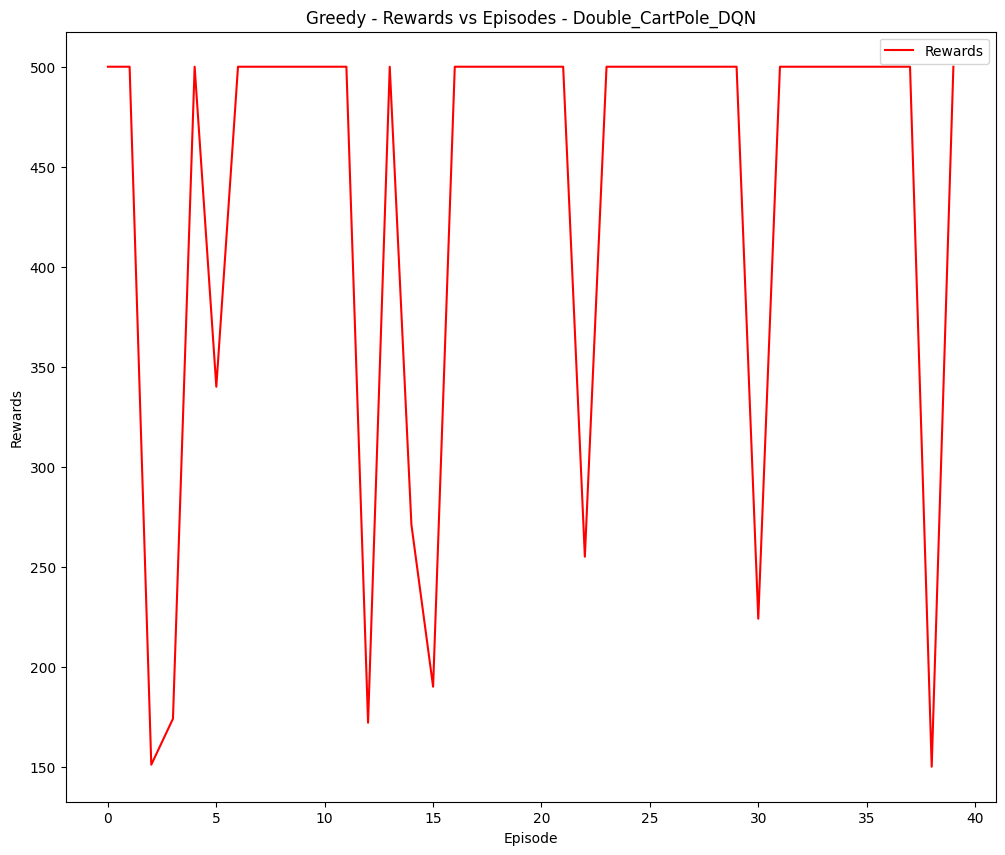

In [13]:
dqnCartPole.greedy(timeSteps=40)


In [6]:
class DuelingNetworkForCartpole(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 64)
        self.layer_3 = nn.Linear(64, action_space)
        self.layer_4 = nn.Linear(64, 1)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        advantage = self.layer_3(x)
        value = self.layer_4(x)
        q = value + (advantage - torch.mean(advantage, dim=1, keepdim=True))
        return q
    


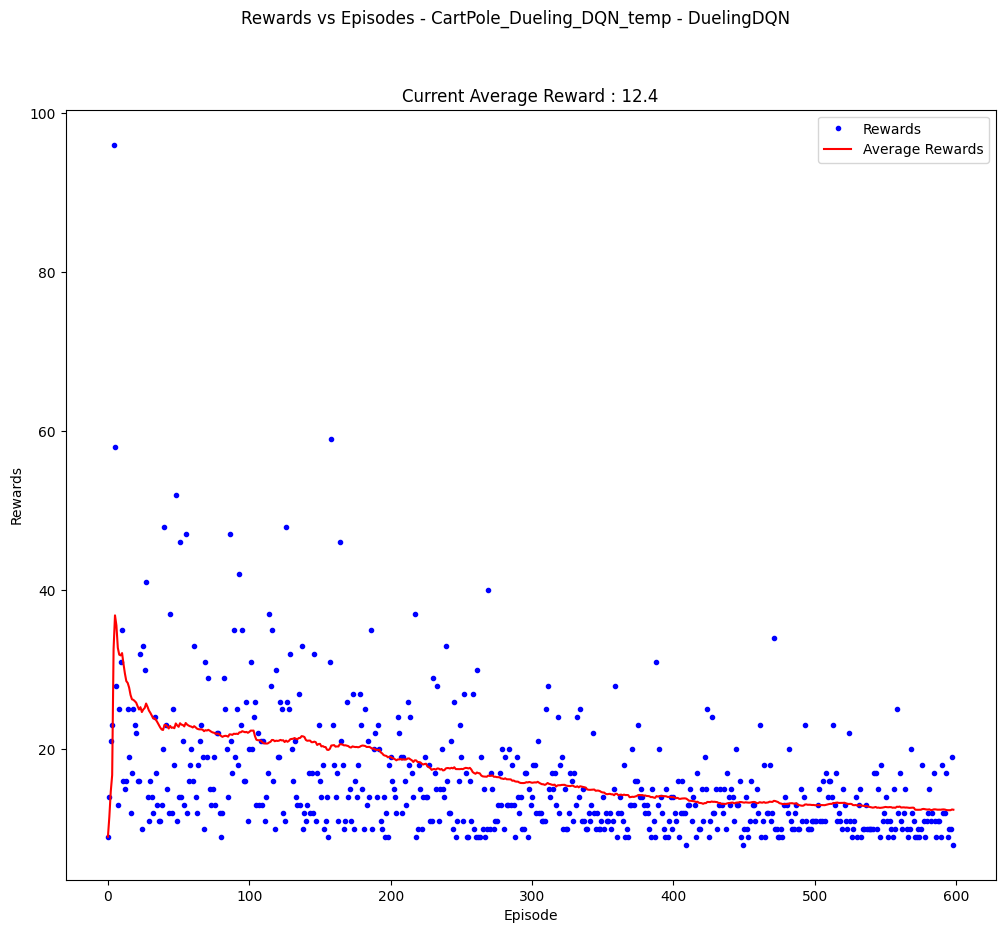

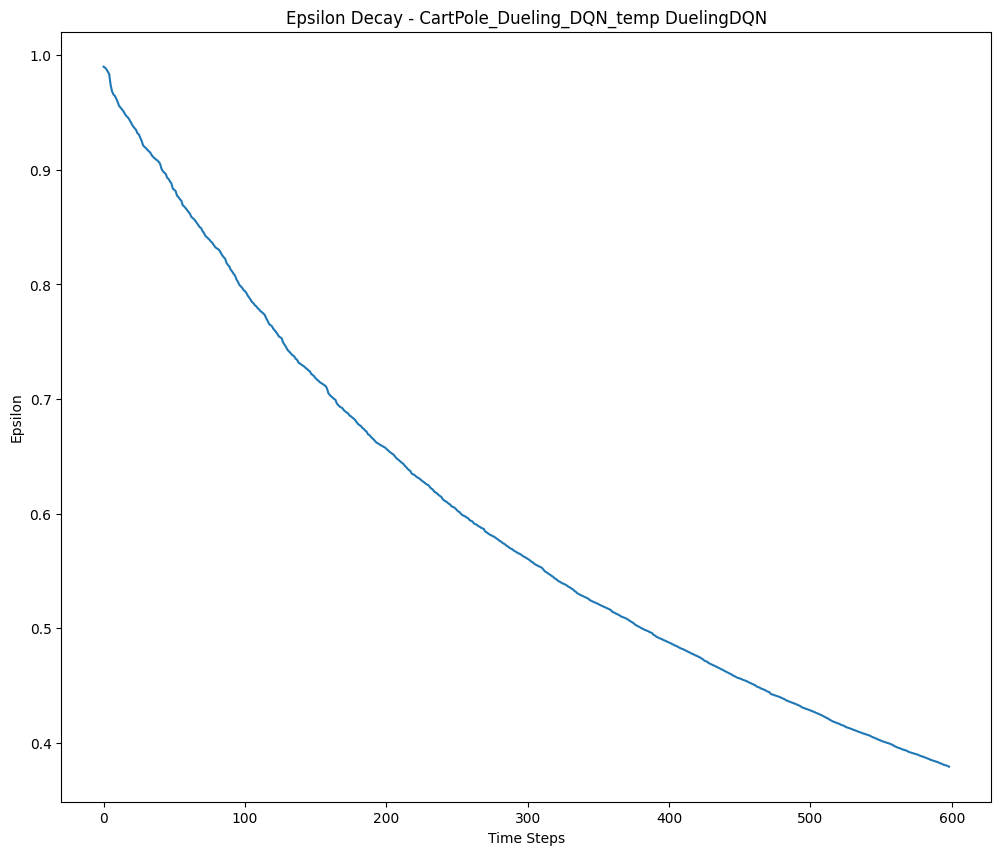

In [10]:
dqnCartPole = DuelingDQN(
    envInfo=EnvInfo(env=gym.make('CartPole-v1')),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=10000,
        learningRate=1e-4,
        batchSize=64,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=600,
        tau=0
    ),
    nnModel=DuelingNetworkForCartpole,
    options = Options(
        resultsPath='./results',
        filePrefix='CartPole_Dueling_DQN_temp',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

dqnCartPole.train()

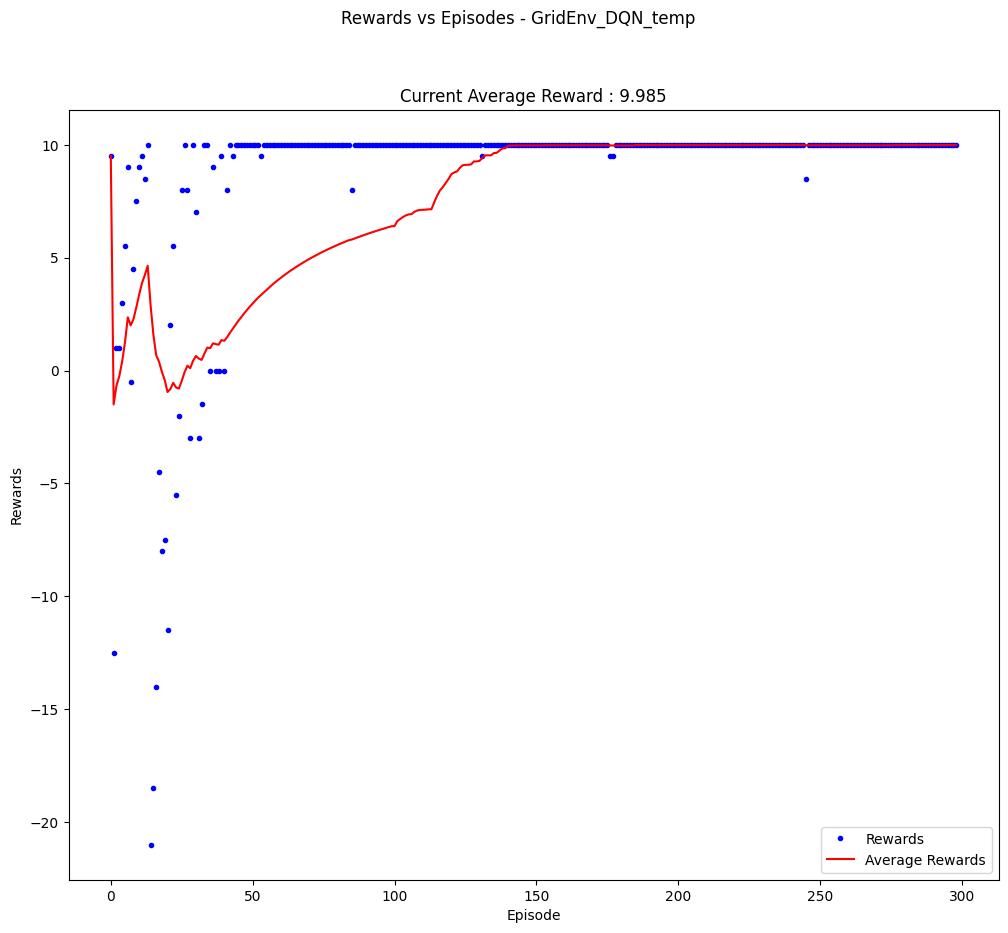

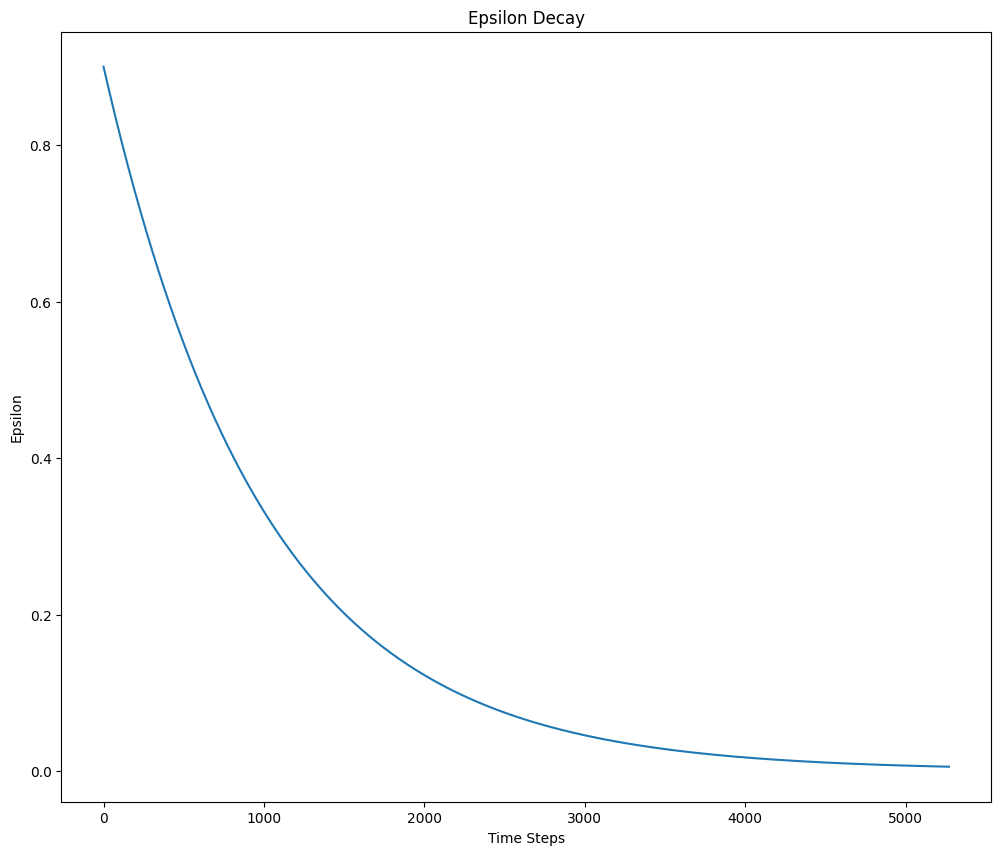

In [8]:
gridEnv = GridEnvironment(env="Deterministic", max_timesteps=100)

dqnCartPole = DuelingDQN(
    envInfo=EnvInfo(
        env=gridEnv,
        observation_space = gridEnv.observation_space.n,
        action_space = gridEnv.action_space.n
    ),
    hyperparams=Hyperparams(
        epsilon=0.9,
        epsilonMin=0.001,
        epsilonDecay=1000,
        memorySize=1000,
        learningRate=0.001,
        batchSize=64,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=300,
        tau=0.05
    ),
    nnModel=NeuralNetworkForCartPole,
    options = Options(
        resultsPath='./results',
        filePrefix='GridEnv_DQN_temp',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

dqnCartPole.train()

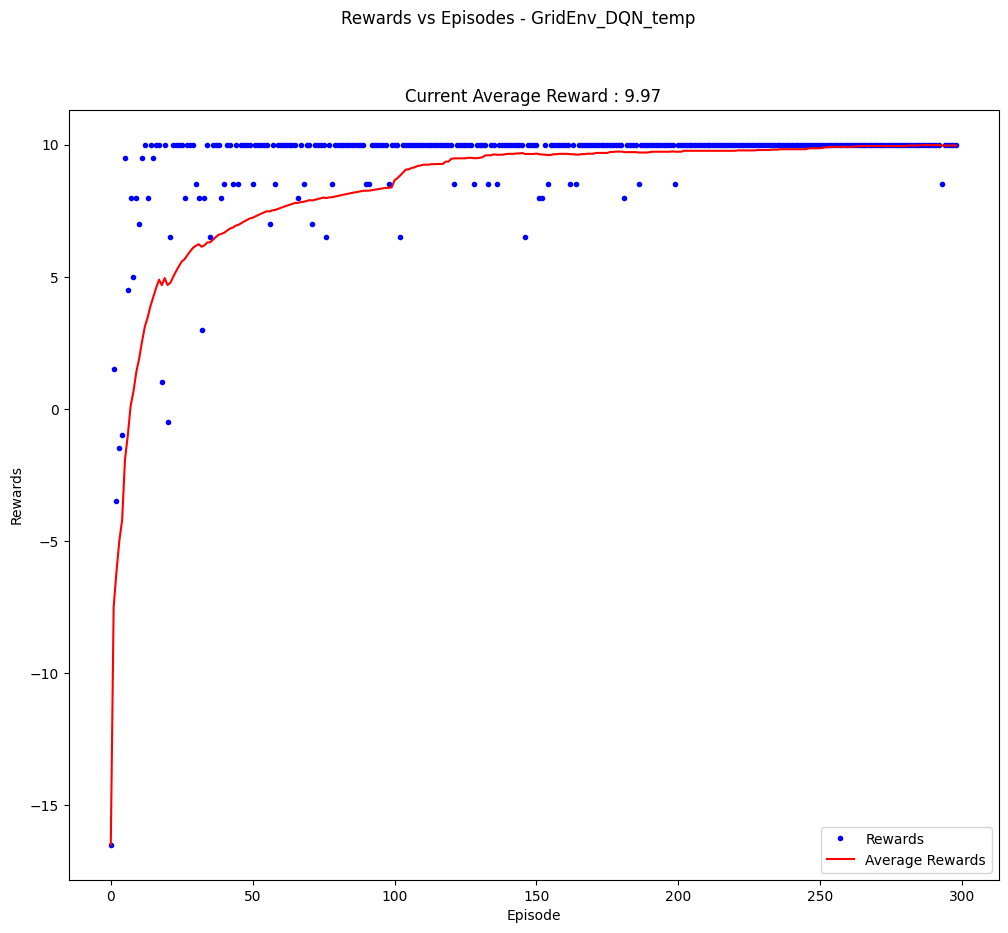

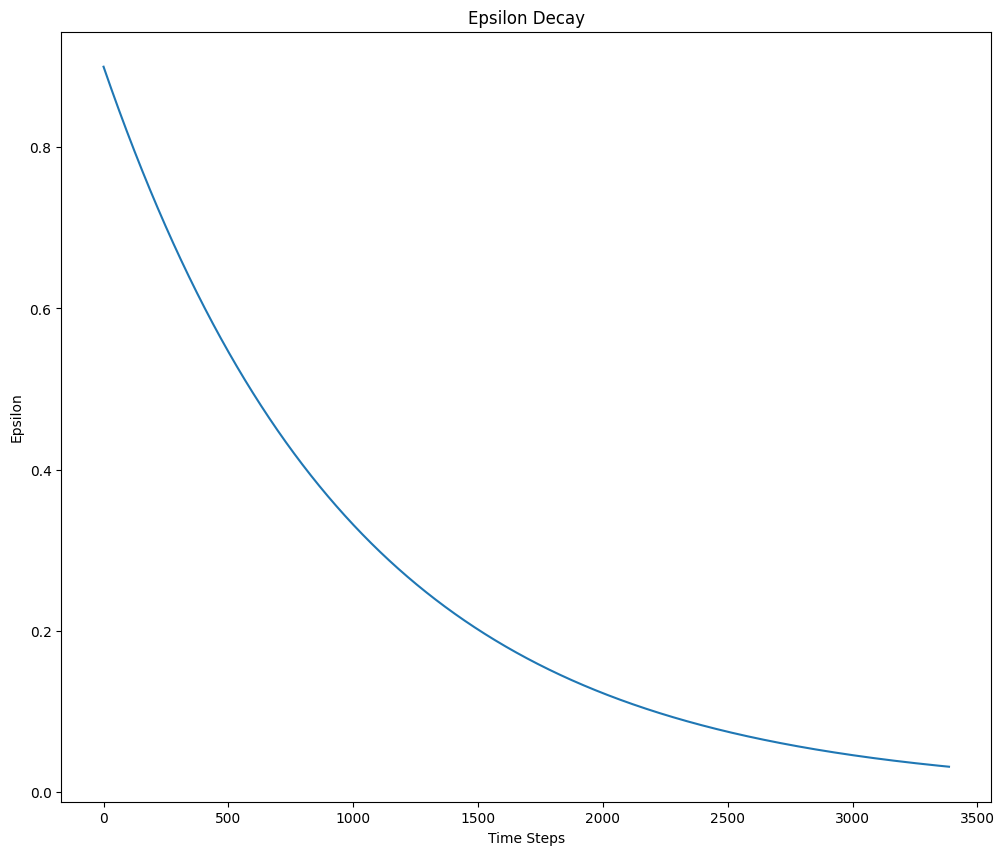

In [9]:
gridEnv = GridEnvironment(env="Deterministic", max_timesteps=100)

dqnCartPole = DoubleDQN(
    envInfo=EnvInfo(
        env=gridEnv,
        observation_space = gridEnv.observation_space.n,
        action_space = gridEnv.action_space.n
    ),
    hyperparams=Hyperparams(
        epsilon=0.9,
        epsilonMin=0.001,
        epsilonDecay=1000,
        memorySize=1000,
        learningRate=0.001,
        batchSize=64,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=300,
        tau=0.05
    ),
    nnModel=NeuralNetworkForCartPole,
    options = Options(
        resultsPath='./results',
        filePrefix='GridEnv_DQN_temp',
        showLiveResults=True,
        logResults = False,
        saveModels = True
    )
)

dqnCartPole.train()

DependencyNotInstalled: box2D is not installed, run `pip install gym[box2d]`